In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Exploratory Data Analysis

In [ ]:
path = "C:\\Users\\lucas\\OneDrive\\Área de Trabalho\\Estudos\\USP\\Ciclo 5\\Projeto Integrador\\Datasets"
df_yellow = pd.read_parquet(os.path.join(path,"yellow_tripdata_2024-01.parquet"))
df_green = pd.read_parquet(os.path.join(path,"green_tripdata_2024-01.parquet"))
df_fhv = pd.read_parquet(os.path.join(path,"fhv_tripdata_2024-01.parquet"))
df_fhvhv = pd.read_parquet(os.path.join(path,"fhvhv_tripdata_2024-01.parquet"))

df_payment_type = pd.DataFrame(
    {
        'payment_type':[1,2,3,4,5,6],
        'payment_type_description':['Credit card','Cash','No charge','Dispute','Unknown','Voided trip']
    }
)

# Quantidade de colunas
print('Formato do dataframe bruto Yellow Trip Data referente Jan-2024:',df_yellow.shape)
print('Formato do dataframe bruto Green Trip Data referente Jan-2024:',df_green.shape)
print('Formato do dataframe bruto For-Hire Vehicle referente Jan-2024:',df_fhv.shape)
print('Formato do dataframe bruto For-Hive Vehicle High Volume records referente Jan-2024:',df_fhvhv.shape)

Formato do dataframe bruto Yellow Trip Data referente Jan-2024: (2964624, 19)
Formato do dataframe bruto Green Trip Data referente Jan-2024: (56551, 20)
Formato do dataframe bruto For-Hire Vehicle referente Jan-2024: (1290116, 7)
Formato do dataframe bruto For-Hive Vehicle High Volume records referente Jan-2024: (19663930, 24)


In [4]:
### Variables
miles_to_km_conversion = 1.609

### Yellow Taxi

In [ ]:
df_yellow = df_yellow.merge(right=df_payment_type,how='left',on='payment_type')
df_yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,payment_type_description
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,Cash
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,Credit card
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,Credit card
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,Credit card
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,Credit card


In [31]:
### NEW COLUMNS FOR YELLOW TAXIS

df_yellow['Travel time (mins)'] = np.where(
    df_yellow['tpep_dropoff_datetime'] < df_yellow['tpep_pickup_datetime'],
    0,
    (df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']).dt.total_seconds()/60
)

df_yellow['trip_distance_km'] = round(df_yellow['trip_distance']*miles_to_km_conversion,2)

In [7]:
def distribuicao(df, coluna,xlabel,min_percentil,max_percentil):
    min_val = np.percentile(df[coluna], min_percentil)
    max_val = np.percentile(df[coluna], max_percentil)

    print(f'Valor mínimo utilizando percentil ({min_percentil}): ',min_val)
    print(f'Valor máximo utilizando percentil ({max_percentil}): ',max_val)
    df_analysis = df.loc[df[coluna].between(min_val,max_val)]

    sns.histplot(df_analysis[coluna], bins=40)
    plt.title(f'Distribuição da coluna {coluna}')
    plt.xlim(min_val, max_val)
    plt.xlabel(xlabel=xlabel)
    plt.show()

def count_category(df,category_column,title, xlabel,ylabel):
    category_count = df[category_column].value_counts()

    # Criando o gráfico de barras
    category_count.plot(kind='bar')

    # Adicionando rótulos e título
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Exibindo o gráfico
    plt.show()


In [33]:
df_yellow.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'payment_type_description', 'Travel time (mins)', 'trip_distance_km'],
      dtype='object')

In [35]:
df_yellow[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra']].describe().round(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra
count,2964624.00,2964624,2964624,2824462.00,2964624.00,2824462.00,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00
mean,1.75,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,1.34,3.65,2.07,166.02,165.12,1.16,18.18,1.45
min,1.00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.00,0.00,1.00,1.00,1.00,0.00,-899.00,-7.50
25%,2.00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.00,1.00,1.00,132.00,114.00,1.00,8.60,0.00
50%,2.00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.00,1.68,1.00,162.00,162.00,1.00,12.80,1.00
75%,2.00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.00,3.11,1.00,234.00,234.00,1.00,20.50,2.50
max,6.00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.00,312722.30,99.00,265.00,265.00,4.00,5000.00,14.25
std,0.43,NaN,NaN,0.85,225.46,9.82,63.62,69.32,0.58,18.95,1.80


In [36]:
df_yellow[['mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'payment_type_description', 'Travel time (mins)', 'trip_distance_km']].describe().round(2)

,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Travel time (mins),trip_distance_km
count,2964624.00,2964624.00,2964624.00,2964624.00,2964624.00,2824462.00,2824462.00,2964624.00,2964624.00
mean,0.48,3.34,0.53,0.98,26.80,2.26,0.14,15.61,5.88
std,0.12,3.90,2.13,0.22,23.39,0.82,0.49,34.85,362.77
min,-0.50,-80.00,-80.00,-1.00,-900.00,-2.50,-1.75,0.00,0.00
25%,0.50,1.00,0.00,1.00,15.38,2.50,0.00,7.15,1.61
50%,0.50,2.70,0.00,1.00,20.10,2.50,0.00,11.63,2.70
75%,0.50,4.12,0.00,1.00,28.56,2.50,0.00,18.68,5.00
max,4.00,428.00,115.92,1.00,5000.00,2.50,1.75,9455.40,503170.18


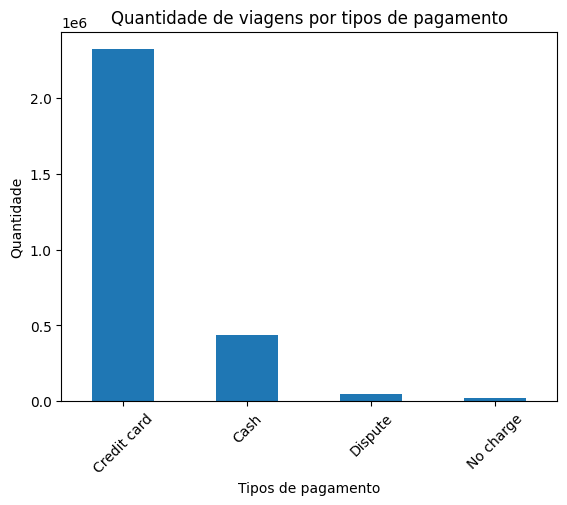

In [8]:
count_category(df_yellow,'payment_type_description','Quantidade de viagens por tipos de pagamento', 'Tipos de pagamento','Quantidade')

Valor mínimo utilizando percentil (0.5):  -17.8
Valor máximo utilizando percentil (99.5):  113.56884999999775


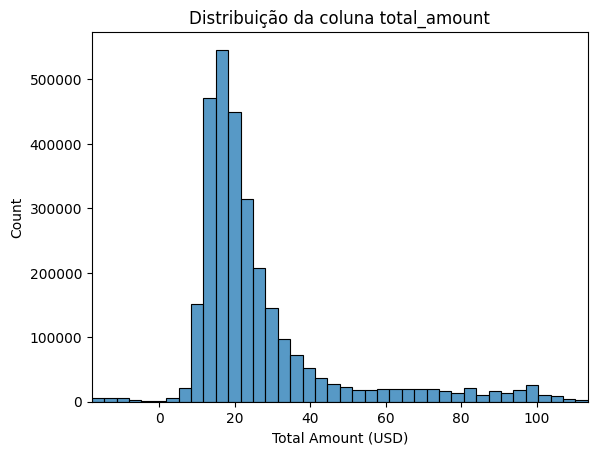

In [9]:
distribuicao(df_yellow,'total_amount','Total Amount (USD)', 0.5, 99.5)

Valor mínimo utilizando percentil (0.5):  -12.8
Valor máximo utilizando percentil (99.5):  89.5


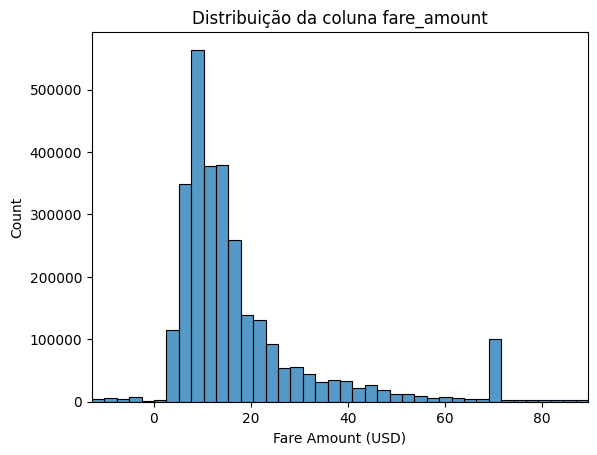

In [10]:
distribuicao(df_yellow,'fare_amount','Fare Amount (USD)', 0.5, 99.5)

Valor mínimo utilizando percentil (0.5):  0.0
Valor máximo utilizando percentil (99.5):  34.8


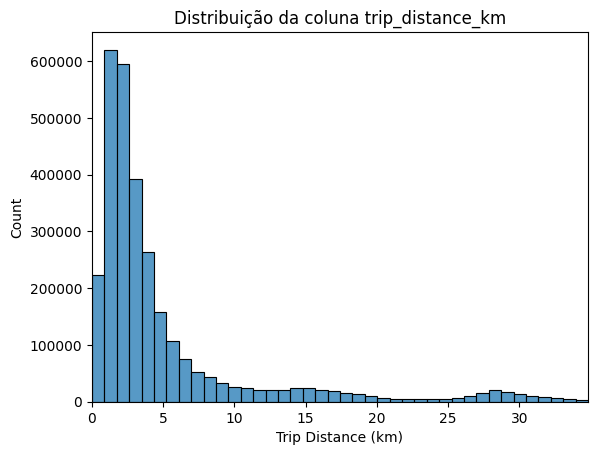

In [32]:
distribuicao(df_yellow,'trip_distance_km','Trip Distance (km)', 0.5, 99.5)

Valor mínimo utilizando percentil (0.5):  0.0
Valor máximo utilizando percentil (99.9):  28.73377000000328


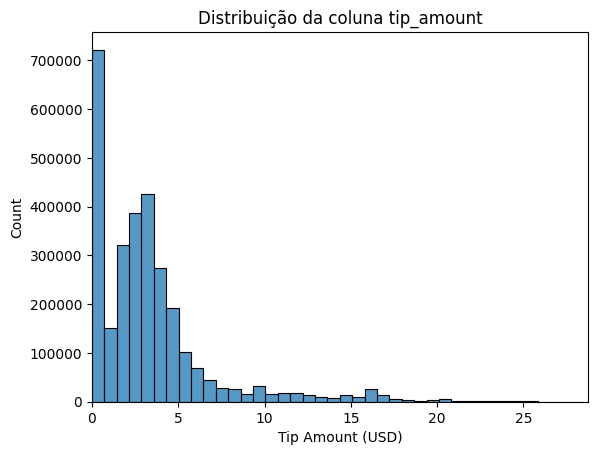

In [ ]:
distribuicao(df_yellow,'tip_amount','Tip Amount (USD)', 0.5, 99.9)

In [ ]:
coluna = 'trip_distance'
valor = 0.0
dataframe = df_yellow
dataframe_name = 'df_yellow'

total_linhas = dataframe.shape[0]
total_valor = dataframe[coluna].loc[dataframe[coluna] == valor].count()
pct = round((total_valor/total_linhas)*100,2)


print(f'Dataframe analisado: {dataframe_name}')
print('-------------------------------------')
print('Total de linhas no dataset:',total_linhas)
print(f'Total de linhas com valor {valor} na coluna "{coluna}": {total_valor}')
print(f'Percentual de linhas com valor {valor} na coluna "{coluna}": {pct}%')


Dataframe analisado: df_yellow
-------------------------------------
Total de linhas no dataset: 2964624
Total de linhas com valor 0.0 na coluna "trip_distance": 60371
Percentual de linhas com valor 0.0 na coluna "trip_distance": 2.04%


In [10]:
df_yellow[['tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee','Travel time (mins)','trip_distance_km']].describe()

,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Travel time (mins),trip_distance_km
count,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.824462e+06,2.824462e+06,2.964624e+06,2.964624e+06
mean,3.335870e+00,5.270212e-01,9.756319e-01,2.680150e+01,2.256122e+00,1.411611e-01,1.561297e+01,5.876400e+00
std,3.896551e+00,2.128310e+00,2.183645e-01,2.338558e+01,8.232747e-01,4.876239e-01,3.485104e+01,3.627693e+02
min,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00,7.150000e+00,1.610000e+00
50%,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00,1.163333e+01,2.700000e+00
75%,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00,1.868333e+01,5.000000e+00
max,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00,9.455400e+03,5.031702e+05


### Green Taxi

In [74]:
df_green = df_green.merge(right=df_payment_type,how='left',on='payment_type')
df_green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,payment_type_description
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,Credit card
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,Credit card
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,Credit card
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,Cash
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,Credit card


In [13]:
df_green.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [28]:
df_green[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra']].describe().round(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra
count,56551.00,56551,56551,53136.00,56551.00,56551.00,53136.00,56551.00,56551.00,56551.00
mean,1.87,2024-01-16 21:13:00.132941,2024-01-16 21:31:10.415660,1.15,96.08,140.50,1.31,31.49,16.93,0.90
min,1.00,2023-12-31 14:38:47,2023-12-31 14:46:45,1.00,1.00,1.00,0.00,0.00,-70.00,-5.00
25%,2.00,2024-01-09 10:57:45,2024-01-09 11:20:21,1.00,74.00,74.00,1.00,1.10,9.30,0.00
50%,2.00,2024-01-17 07:20:09,2024-01-17 07:34:18,1.00,75.00,140.00,1.00,1.79,13.50,0.00
75%,2.00,2024-01-24 15:28:22,2024-01-24 15:40:44,1.00,112.00,225.00,1.00,3.08,19.80,2.50
max,2.00,2024-01-31 23:57:29,2024-02-01 19:17:30,99.00,265.00,265.00,9.00,201421.68,1422.60,10.25
std,0.34,NaN,NaN,1.05,57.86,76.56,0.98,1417.46,15.36,1.34


In [29]:
df_green[['mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge']].describe().round(2)

,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,56551.00,56551.00,56551.00,0.0,56551.00,56551.00,53136.00,53133.00,53136.00
mean,0.58,2.26,0.19,NaN,0.98,22.40,1.32,1.03,0.78
std,0.38,2.85,1.19,NaN,0.14,16.96,0.50,0.18,1.24
min,-0.50,-1.66,0.00,NaN,-1.00,-76.50,1.00,1.00,-2.75
25%,0.50,0.00,0.00,NaN,1.00,13.44,1.00,1.00,0.00
50%,0.50,2.00,0.00,NaN,1.00,18.42,1.00,1.00,0.00
75%,0.50,3.50,0.00,NaN,1.00,26.60,2.00,1.00,2.75
max,4.25,110.00,24.05,NaN,1.00,1424.10,5.00,2.00,2.75


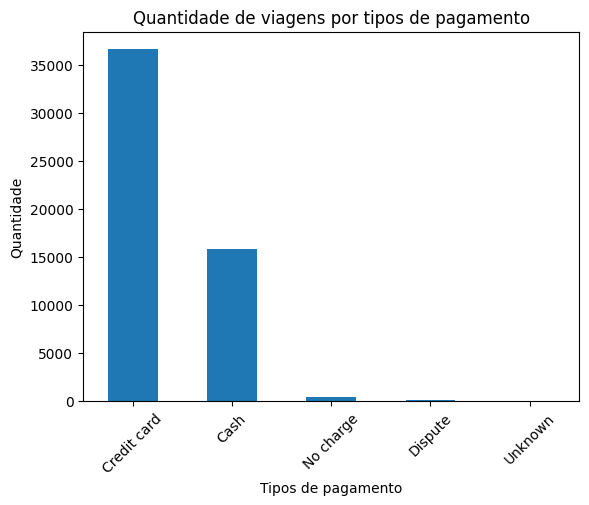

In [75]:
count_category(df_green,'payment_type_description','Quantidade de viagens por tipos de pagamento', 'Tipos de pagamento','Quantidade')

In [20]:
df_green['Travel time (mins)'] = np.where(
    df_green['lpep_dropoff_datetime'] < df_green['lpep_pickup_datetime'],
    0,
    (df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds()/60
)

df_green['trip_distance_km'] = round(df_green['trip_distance']*miles_to_km_conversion,2)

Valor mínimo utilizando percentil (0.5):  4.5
Valor máximo utilizando percentil (99.5):  94.175


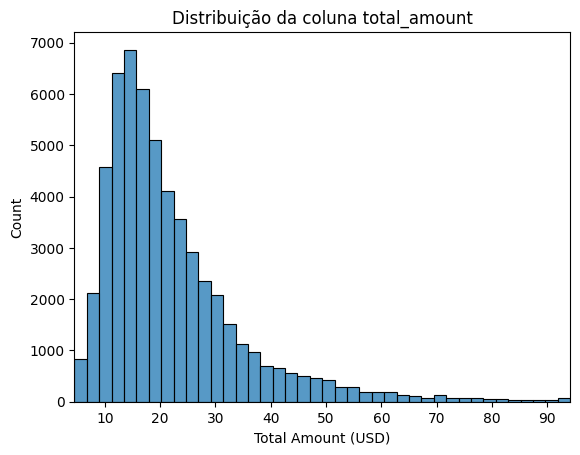

In [52]:
distribuicao(df_green,'total_amount','Total Amount (USD)', 0.5, 99.5)

Valor mínimo utilizando percentil (0.0):  0.0
Valor máximo utilizando percentil (99.5):  30.044999999999998


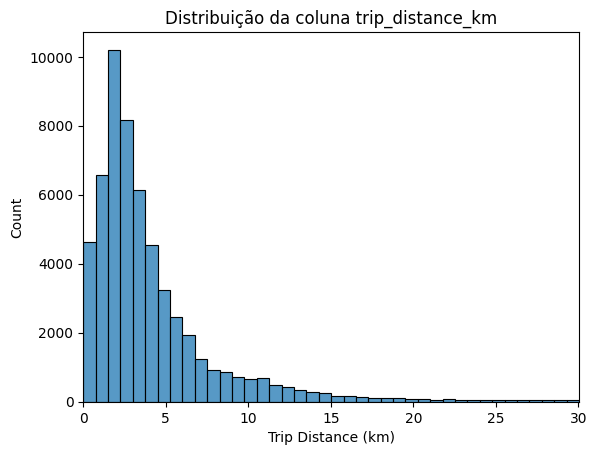

In [57]:
distribuicao(df_green,'trip_distance_km','Trip Distance (km)', 0.0, 99.5)

Valor mínimo utilizando percentil (0.5):  0.05
Valor máximo utilizando percentil (99.5):  94.2875


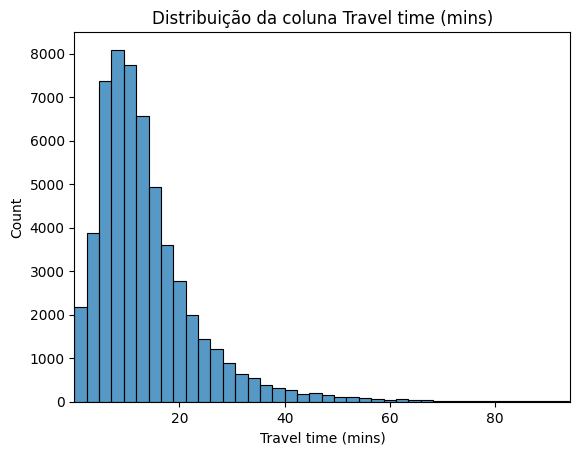

In [ ]:
distribuicao(df_green,'Travel time (mins)','Travel time (mins)', 0.5, 99.5)

Valor mínimo utilizando percentil (0.5):  0.0
Valor máximo utilizando percentil (99.9):  22.112000000000698


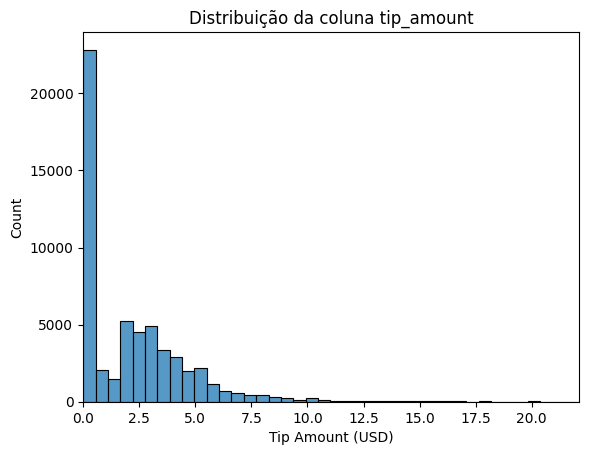

In [82]:
distribuicao(df_green,'tip_amount','Tip Amount (USD)', 0.5, 99.9)

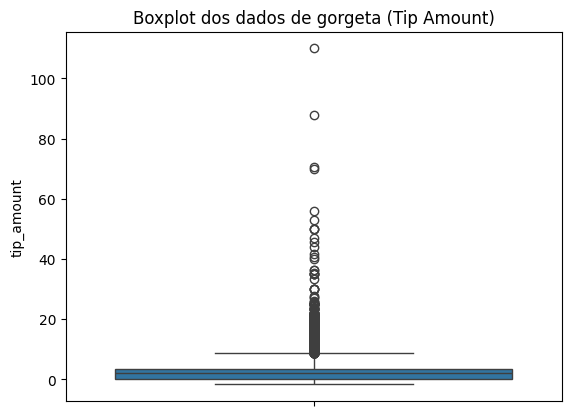

In [85]:
sns.boxplot(df_green,y='tip_amount')
plt.title('Boxplot dos dados de gorgeta (Tip Amount)')
plt.show()

### FHV

In [15]:
df_fhv.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00053,2024-01-01 00:15:00,2024-01-01 02:13:00,NaN,NaN,NaN,B00014
1,B00111,2024-01-01 00:30:00,2024-01-01 02:37:00,NaN,NaN,NaN,B00111
2,B00112,2024-01-01 00:27:24,2024-01-01 01:12:05,NaN,14.0,NaN,B00112
3,B00112,2024-01-01 00:10:09,2024-01-01 00:25:39,NaN,133.0,NaN,B00112
4,B00112,2024-01-01 00:57:07,2024-01-01 01:05:04,NaN,14.0,NaN,B00112


In [16]:
df_fhv['Travel time (mins)'] = np.where(
    df_fhv['dropOff_datetime'] < df_fhv['pickup_datetime'],
    0,
    (df_fhv['dropOff_datetime'] - df_fhv['pickup_datetime']).dt.total_seconds()/60
)

In [27]:
df_fhv.describe().round(2)

,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Travel time (mins)
count,1290116,1290116,274816.00,1107055.00,0.0,1290116.00
mean,2024-01-16 22:59:15.936936,2024-01-16 23:33:26.867784,134.29,135.18,NaN,34.18
min,2024-01-01 00:00:01,2024-01-01 00:03:56,1.00,1.00,NaN,0.02
25%,2024-01-09 12:45:24.750000,2024-01-09 13:11:52.750000,72.00,69.00,NaN,9.78
50%,2024-01-17 09:11:49,2024-01-17 09:39:28,133.00,132.00,NaN,17.00
75%,2024-01-24 13:07:29.500000,2024-01-24 13:41:00,206.00,212.00,NaN,29.42
max,2024-01-31 23:59:59,2025-01-25 06:35:00,265.00,265.00,NaN,527070.00
std,NaN,NaN,74.42,78.89,NaN,769.02


Valor mínimo utilizando percentil (0.5):  0.5166666666666667
Valor máximo utilizando percentil (99.5):  165.0450000000031


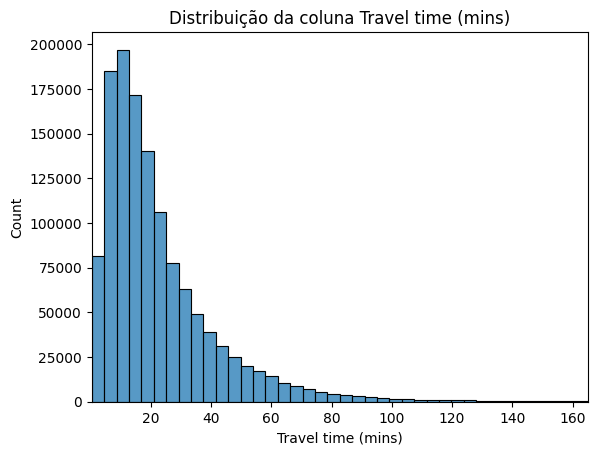

In [117]:
distribuicao(df_fhv,'Travel time (mins)','Travel time (mins)', 0.5, 99.5)

### FHV HV

In [18]:
df_fhvhv.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-01-01 00:21:47,2024-01-01 00:25:06,2024-01-01 00:28:08,2024-01-01 01:05:39,161,158,2.83,2251,45.61,0.0,1.25,4.05,2.75,0.0,0.0,40.18,N,N,N,N,N
1,HV0003,B03404,B03404,2024-01-01 00:10:56,2024-01-01 00:11:08,2024-01-01 00:12:53,2024-01-01 00:20:05,137,79,1.57,432,10.05,0.0,0.28,0.89,2.75,0.0,0.0,6.12,N,N,N,N,N
2,HV0003,B03404,B03404,2024-01-01 00:20:04,2024-01-01 00:21:51,2024-01-01 00:23:05,2024-01-01 00:35:16,79,186,1.98,731,18.07,0.0,0.50,1.60,2.75,0.0,0.0,9.47,N,N,N,N,N
3,HV0003,B03404,B03404,2024-01-01 00:35:46,2024-01-01 00:39:59,2024-01-01 00:41:04,2024-01-01 00:56:34,234,148,1.99,930,17.17,0.0,0.47,1.52,2.75,0.0,0.0,11.35,N,N,N,N,N
4,HV0003,B03404,B03404,2024-01-01 00:48:19,2024-01-01 00:56:23,2024-01-01 00:57:21,2024-01-01 01:10:02,148,97,2.65,761,38.67,0.0,1.06,3.43,2.75,0.0,0.0,28.63,N,N,N,N,N


In [19]:
df_fhvhv['Travel time (mins)'] = np.where(
    df_fhvhv['dropoff_datetime'] < df_fhvhv['pickup_datetime'],
    0,
    (df_fhvhv['dropoff_datetime'] - df_fhvhv['pickup_datetime']).dt.total_seconds()/60
)


df_fhvhv['Time lapse between requsest and pickup (mins)'] = np.where(
    df_fhvhv['pickup_datetime'] < df_fhvhv['request_datetime'],
    0,
    (df_fhvhv['pickup_datetime'] - df_fhvhv['request_datetime']).dt.total_seconds()/60
)

df_fhvhv['Driver waiting time'] = np.where(
    df_fhvhv['on_scene_datetime'] < df_fhvhv['request_datetime'],
    0,
    (df_fhvhv['on_scene_datetime'] - df_fhvhv['request_datetime']).dt.total_seconds()/60
)

df_fhvhv['trip_kilometers'] = df_fhvhv['trip_miles']*miles_to_km_conversion

In [20]:
df_fhvhv.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'Travel time (mins)',
       'Time lapse between requsest and pickup (mins)', 'Driver waiting time',
       'trip_kilometers'],
      dtype='object')

In [26]:
df_fhvhv[['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax']].describe().round(2)

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax
count,19663930,14445193,19663930,19663930,19663930.00,19663930.00,19663930.00,19663930.00,19663930.00,19663930.00,19663930.00,19663930.00
mean,2024-01-16 22:16:37.965603,2024-01-17 02:22:41.626253,2024-01-16 22:20:45.530691,2024-01-16 22:39:15.999917,139.14,142.42,4.84,1110.47,23.96,1.06,0.69,2.03
min,2023-12-31 23:01:55,2023-12-31 22:55:22,2024-01-01 00:00:00,2024-01-01 00:02:35,1.00,1.00,0.00,0.00,-43.09,0.00,0.00,0.00
25%,2024-01-09 14:57:44,2024-01-09 18:12:25,2024-01-09 15:01:51,2024-01-09 15:22:16,75.00,76.00,1.49,571.00,11.63,0.00,0.32,0.98
50%,2024-01-17 08:05:05.500000,2024-01-17 13:01:53,2024-01-17 08:11:56,2024-01-17 08:31:05,140.00,142.00,2.83,912.00,18.00,0.00,0.50,1.53
75%,2024-01-24 13:28:24.750000,2024-01-24 16:23:39,2024-01-24 13:31:43.750000,2024-01-24 13:52:05.750000,211.00,217.00,5.99,1430.00,28.80,0.00,0.81,2.48
max,2024-02-01 00:07:07,2024-01-31 23:59:58,2024-01-31 23:59:59,2024-02-01 02:10:41,265.00,265.00,417.62,52060.00,1911.16,141.02,53.94,152.69
std,NaN,NaN,NaN,NaN,74.90,77.78,5.70,772.22,20.54,3.80,0.63,1.68


In [25]:
df_fhvhv[['congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'Travel time (mins)',
       'Time lapse between requsest and pickup (mins)', 'Driver waiting time',
       'trip_kilometers']].describe().round(2)

,congestion_surcharge,airport_fee,tips,driver_pay,Travel time (mins),Time lapse between requsest and pickup (mins),Driver waiting time,trip_kilometers
count,19663930.00,19663930.00,19663930.00,19663930.00,19663930.00,19663930.00,14445193.00,19663930.00
mean,1.08,0.19,1.06,18.27,18.51,4.25,3.13,7.79
std,1.34,0.67,3.13,15.46,12.87,2.71,2.48,9.17
min,0.00,0.00,0.00,-67.76,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,8.21,9.52,2.58,1.50,2.40
50%,0.00,0.00,0.00,13.57,15.20,3.67,2.55,4.55
75%,2.75,0.00,0.00,22.83,23.83,5.20,4.07,9.64
max,8.25,6.90,196.80,1218.17,867.67,1230.62,225.80,671.95


Valor mínimo utilizando percentil (0.5):  2.683333333333333
Valor máximo utilizando percentil (99.5):  71.96666666666667


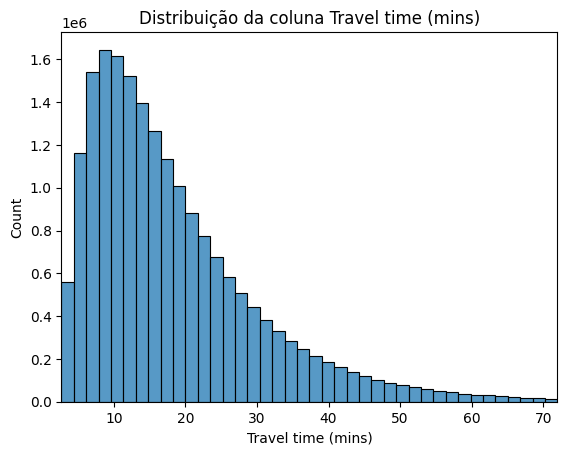

Valor mínimo utilizando percentil (0.5):  0.0
Valor máximo utilizando percentil (99.5):  16.05


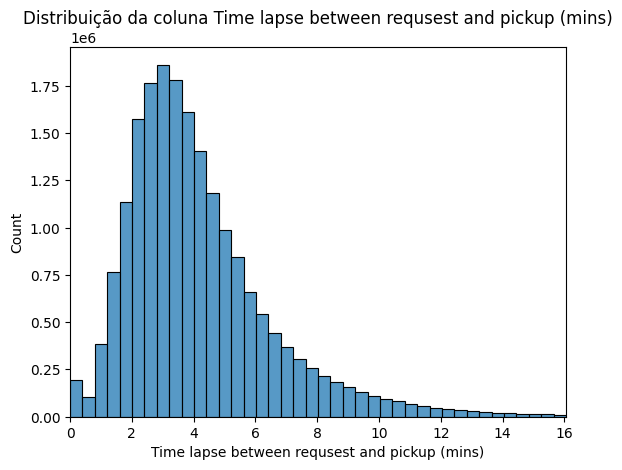

Valor mínimo utilizando percentil (0.5):  5.39
Valor máximo utilizando percentil (99.5):  90.46


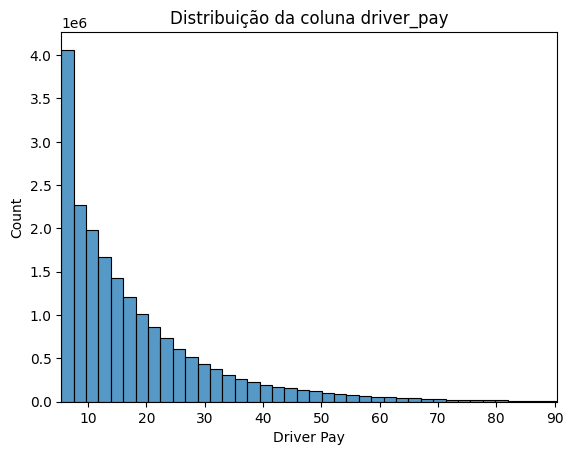

Valor mínimo utilizando percentil (0.5):  0.62751
Valor máximo utilizando percentil (99.9):  82.50952


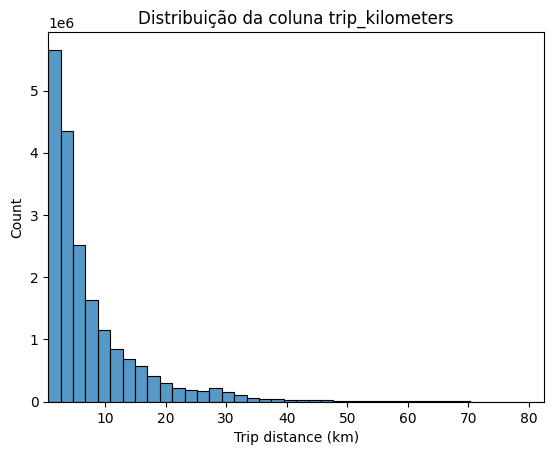

In [125]:

distribuicao(df_fhvhv,'Travel time (mins)','Travel time (mins)', 0.5, 99.5)
distribuicao(df_fhvhv,'Time lapse between requsest and pickup (mins)','Time lapse between requsest and pickup (mins)', 0.5, 99.5)
# distribuicao(df_fhvhv,'Driver waiting time','Driver Waiting Time (mins)', 0.5, 99.9)
distribuicao(df_fhvhv,'driver_pay','Driver Pay', 0.5, 99.5)
distribuicao(df_fhvhv,'trip_kilometers','Trip distance (km)', 0.5, 99.9)



In [37]:
### Conversions
df_yellow['trip_distance_km'] = df_yellow['trip_distance']*km_conversion

In [4]:
df_yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [5]:
print("""
- hvfhs_license_num: Número da licença do veículo de aluguel (FHV). Identifica a empresa ou base que despachou o veículo.
- dispatching_base_num: Número de identificação da base que despachou o veículo.
- originating_base_num: Número de identificação da base que solicitou o veículo.
- request_datetime: Data e hora em que a viagem foi solicitada.
- on_scene_datetime: Data e hora em que o veículo chegou ao local de embarque.
- pickup_datetime: Data e hora em que o passageiro foi buscado.
- dropoff_datetime: Data e hora em que o passageiro foi deixado no destino.
- PULocationID: Código do local de embarque (Pickup Location ID). Corresponde a um código de zona do TLC.
- DOLocationID: Código do local de desembarque (Dropoff Location ID). Também corresponde a um código de zona do TLC.
- trip_miles: Distância percorrida na viagem, em milhas.
- trip_time: Duração da viagem, em segundos.
- base_passenger_fare: Tarifa base da viagem, antes de taxas e outros encargos.
- tolls: Valor dos pedágios pagos durante a viagem.
- bcf: Provavelmente "Black Car Fund" - uma taxa para financiar o fundo de compensação de trabalhadores para motoristas de táxi e veículos de aluguel.
- sales_tax: Imposto sobre vendas da viagem.
- congestion_surcharge: Taxa de congestionamento aplicada em algumas áreas de Nova York.
- airport_fee: Taxa aeroportuária, se aplicável.
- tips: Valor das gorjetas pagas pelo passageiro.
- driver_pay: Pagamento ao motorista pela viagem.
- shared_request_flag: Indica se a viagem foi solicitada como compartilhada (carona).
- shared_match_flag: Indica se a viagem foi correspondida com outros passageiros para compartilhamento.
- access_a_ride_flag: Indica se a viagem foi solicitada através do programa Access-A-Ride (para pessoas com deficiência).
- wav_request_flag: Indica se foi solicitada uma viagem acessível para cadeira de rodas (Wheelchair Accessible Vehicle).
- wav_match_flag: Indica se a viagem foi realizada com um veículo acessível para cadeira de rodas.
""")


- hvfhs_license_num: Número da licença do veículo de aluguel (FHV). Identifica a empresa ou base que despachou o veículo.
- dispatching_base_num: Número de identificação da base que despachou o veículo.
- originating_base_num: Número de identificação da base que solicitou o veículo.
- request_datetime: Data e hora em que a viagem foi solicitada.
- on_scene_datetime: Data e hora em que o veículo chegou ao local de embarque.
- pickup_datetime: Data e hora em que o passageiro foi buscado.
- dropoff_datetime: Data e hora em que o passageiro foi deixado no destino.
- PULocationID: Código do local de embarque (Pickup Location ID). Corresponde a um código de zona do TLC.
- DOLocationID: Código do local de desembarque (Dropoff Location ID). Também corresponde a um código de zona do TLC.
- trip_miles: Distância percorrida na viagem, em milhas.
- trip_time: Duração da viagem, em segundos.
- base_passenger_fare: Tarifa base da viagem, antes de taxas e outros encargos.
- tolls: Valor dos pedágios

In [ ]:
df_yellow_grouped = df_yellow.groupby(['PULocationID','DOLocationID']).agg(
    {
        'trip_distance':['mean','max','min','count','sum']
        ,'total_amount':['mean','max','min','count','sum']
        ,'fare_amount':['mean','max','min','count','sum']
    }
).reset_index()

df_yellow_grouped.columns = [
    'PULocationID',
    'DOLocationID',
    'trip_distance_mean',
    'trip_distance_max',
    'trip_distance_min',
    'trip_distance_count',
    'total_amount_mean',
    'total_amount_max',
    'total_amount_min',
    'total_amount_count',
    'fare_amount_mean',
    'fare_amount_max',
    'fare_amount_min',
    'fare_amount_count'
]

In [36]:
df_yellow_grouped.sort_values(by='trip_distance_count', ascending=False)

,PULocationID,DOLocationID,trip_distance_mean,trip_distance_max,trip_distance_min,trip_distance_count,total_amount_mean,total_amount_max,total_amount_min,total_amount_count,fare_amount_mean,fare_amount_max,fare_amount_min,fare_amount_count,trip_distance_mean_km
23274,237,236,1.058019,7.89,0.00,21883,15.508877,117.00,-79.00,21883,8.762446,94.0,-70.0,21883,1.702353
23063,236,237,1.044600,18.49,0.00,19402,15.878771,121.62,-74.00,19402,9.174641,93.3,-70.0,19402,1.680761
23062,236,236,0.623932,53.64,0.00,15955,13.050416,252.00,-83.50,15955,6.855380,200.0,-80.0,15955,1.003907
23275,237,237,0.621655,11.96,0.00,14938,13.529931,257.62,-90.50,14938,7.337044,220.0,-87.0,14938,1.000243
15546,161,237,1.074143,23.83,0.00,10275,16.735615,163.80,-31.20,10275,9.691668,132.5,-24.7,10275,1.728296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14529,151,20,9.700000,9.70,9.70,1,31.000000,31.00,31.00,1,29.500000,29.5,29.5,1,15.607300
14532,151,31,12.440000,12.44,12.44,1,64.660000,64.66,64.66,1,49.200000,49.2,49.2,1,20.015960
14533,151,32,0.000000,0.00,0.00,1,35.000000,35.00,35.00,1,33.500000,33.5,33.5,1,0.000000
14536,151,36,16.700000,16.70,16.70,1,96.250000,96.25,96.25,1,73.000000,73.0,73.0,1,26.870300


In [35]:
df_yellow_grouped['trip_distance_mean_km'] = df_yellow_grouped['trip_distance_mean']*km_conversion